In [15]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [20]:
print(cities)

['castro', 'ushuaia', 'cidreira', 'sadovoye', 'ust-ishim', 'port alfred', 'ilulissat', 'jamestown', 'coihaique', 'salalah', 'hermanus', 'berlevag', 'port elizabeth', 'illoqqortoormiut', 'touros', 'bredasdorp', 'mar del plata', 'qaanaaq', 'corn island', 'cibitoke', 'tucuman', 'husavik', 'korla', 'skibbereen', 'florida', 'nador', 'toul', 'bargal', 'grao mogol', 'dikson', 'cape town', 'hithadhoo', 'cap malheureux', 'attawapiskat', 'grand gaube', 'wukari', 'bambous virieux', 'el balyana', 'upernavik', 'natal', 'grand river south east', 'amderma', 'victoria', 'london', 'pisco', 'vila franca do campo', 'umzimvubu', 'nanortalik', 'narsaq', 'itarema', 'necochea', 'semey', 'lodja', 'dolbeau', 'lucapa', 'tambo', 'huarmey', 'arraial do cabo', 'anna paulowna', 'tasiilaq', 'bathsheba', 'georgetown', 'ikryanoye', 'clyde river', 'vestmannaeyjar', 'kampene', 'hambantota', 'lovozero', 'taolanaro', 'busselton', 'kruisfontein', 'stornoway', 'namibe', 'muravlenko', 'sao filipe', 'honningsvag', 'albany', '

In [21]:
#import the requests library
import requests

#Import API key
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3bd268db537c0360a438f9828074951


In [23]:
#Import the datetime module from the datetime library
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | sadovoye
Processing Record 5 of Set 1 | ust-ishim
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | berlevag
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | corn island
Processing Record 20 of Set 1 | cibitoke
Processing Record 21 of Set 1 | tucuman
Processing Record 22 of Set 1 | husav

City not found. Skipping...
Processing Record 34 of Set 4 | bandarbeyla
Processing Record 35 of Set 4 | san cristobal
Processing Record 36 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 37 of Set 4 | east massapequa
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | omboue
Processing Record 40 of Set 4 | karpathos
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | saint-francois
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | piet retief
Processing Record 46 of Set 4 | boa vista
Processing Record 47 of Set 4 | ravar
Processing Record 48 of Set 4 | ust-kulom
Processing Record 49 of Set 4 | vila do maio
Processing Record 50 of Set 4 | ust-tsilma
Processing Record 1 of Set 5 | andenes
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | torbat-e jam
Processing Record 4 of Set 5 | marzuq
Processing Record 5 of Set 5 | wajir
Processing Record 6 of Set

Processing Record 22 of Set 8 | vammala
Processing Record 23 of Set 8 | moose factory
Processing Record 24 of Set 8 | grand-lahou
Processing Record 25 of Set 8 | mizdah
Processing Record 26 of Set 8 | thunder bay
Processing Record 27 of Set 8 | klaksvik
Processing Record 28 of Set 8 | issoire
Processing Record 29 of Set 8 | rovaniemi
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | jaru
Processing Record 32 of Set 8 | svetlyy
Processing Record 33 of Set 8 | volterra
Processing Record 34 of Set 8 | asfi
Processing Record 35 of Set 8 | tromso
Processing Record 36 of Set 8 | tazmalt
Processing Record 37 of Set 8 | portobelo
Processing Record 38 of Set 8 | riyadh
Processing Record 39 of Set 8 | pervomayskoye
Processing Record 40 of Set 8 | cabo rojo
Processing Record 41 of Set 8 | nara
Processing Record 42 of Set 8 | brae
Processing Record 43 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 44 of Set 8 | thinadhoo
Processing Record 45 of

Processing Record 8 of Set 12 | srivardhan
Processing Record 9 of Set 12 | gogrial
Processing Record 10 of Set 12 | bella union
Processing Record 11 of Set 12 | cartagena
Processing Record 12 of Set 12 | fuerte olimpo
Processing Record 13 of Set 12 | abeche
Processing Record 14 of Set 12 | rafai
Processing Record 15 of Set 12 | santa cruz del sur
Processing Record 16 of Set 12 | amapa
Processing Record 17 of Set 12 | arroyo
Processing Record 18 of Set 12 | mahanje
Processing Record 19 of Set 12 | zlobin
Processing Record 20 of Set 12 | hualmay
Processing Record 21 of Set 12 | san pedro
Processing Record 22 of Set 12 | voyvozh
Processing Record 23 of Set 12 | angra
City not found. Skipping...
Processing Record 24 of Set 12 | dubai
Processing Record 25 of Set 12 | kleck
City not found. Skipping...
Processing Record 26 of Set 12 | sao jose da coroa grande
Processing Record 27 of Set 12 | bonfim
Processing Record 28 of Set 12 | palanga
Processing Record 29 of Set 12 | turayf
Processing Rec

In [25]:
len(city_data)

565

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.79,-50.01,51.69,97,100,5.37,BR,2020-08-20 03:31:18
1,Ushuaia,-54.80,-68.30,39.20,86,75,28.86,AR,2020-08-20 03:31:19
2,Cidreira,-30.18,-50.21,50.45,74,26,11.63,BR,2020-08-20 03:31:19
3,Sadovoye,47.78,44.51,73.83,51,0,8.41,RU,2020-08-20 03:31:19
4,Ust-Ishim,57.69,71.17,54.07,93,100,4.50,RU,2020-08-20 03:31:19
5,Port Alfred,-33.59,26.89,51.78,56,1,11.92,ZA,2020-08-20 03:31:20
6,Ilulissat,69.22,-51.10,51.80,43,0,3.36,GL,2020-08-20 03:31:20
7,Jamestown,42.10,-79.24,57.20,71,1,4.70,US,2020-08-20 03:31:20
8,Coihaique,-45.58,-72.07,37.40,84,82,4.70,CL,2020-08-20 03:31:20
9,Salalah,17.02,54.09,77.00,100,90,3.36,OM,2020-08-20 03:31:21


In [32]:
#Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [34]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2020-08-20 03:31:18,-24.79,-50.01,51.69,97,100,5.37
1,Ushuaia,AR,2020-08-20 03:31:19,-54.80,-68.30,39.20,86,75,28.86
2,Cidreira,BR,2020-08-20 03:31:19,-30.18,-50.21,50.45,74,26,11.63
3,Sadovoye,RU,2020-08-20 03:31:19,47.78,44.51,73.83,51,0,8.41
4,Ust-Ishim,RU,2020-08-20 03:31:19,57.69,71.17,54.07,93,100,4.50
5,Port Alfred,ZA,2020-08-20 03:31:20,-33.59,26.89,51.78,56,1,11.92
6,Ilulissat,GL,2020-08-20 03:31:20,69.22,-51.10,51.80,43,0,3.36
7,Jamestown,US,2020-08-20 03:31:20,42.10,-79.24,57.20,71,1,4.70
8,Coihaique,CL,2020-08-20 03:31:20,-45.58,-72.07,37.40,84,82,4.70
9,Salalah,OM,2020-08-20 03:31:21,17.02,54.09,77.00,100,90,3.36


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
#Import time module.
import time
#Get today's date in seconds
today = time.time()
today

1598196591.5014365

In [40]:
today = time.strftime("%x")
today

'08/23/20'

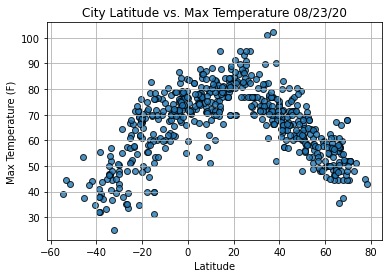

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

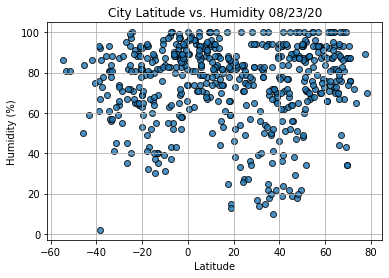

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

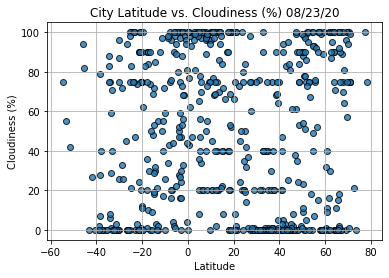

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

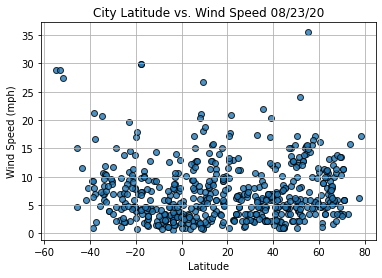

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()